# **Random Walk on a Continuum**
The problem is picked from *Introduction to Computer Simulation Methods* by Gould, Tobochnik and Christian. It is a modification of a random walk in 2 dimensions. The problem as stated in the book is:

One of the first continuum models of a random walk was proposed by Rayleigh in 1919. In this model the length a of each step is a random variable and the direction of each step is uniformly random. In this case the variable of interest is R, the distance of the walker from the origin after N steps. The model is known as the freely jointed chain in polymer physics in which case R is the end-to-end distance of the polymer. For simplicity, we first consider a walker in two dimensions with steps of equal (unit) length at a random angle.

1. Write a Monte Carlo program to compute $\langle{}R\rangle{}$ and determine its dependence on $N$.
2. Because $R$ is a continuous variable, we need to compute $p_N(R)\Delta R$, the probability that $R$ is between $R$ and $R+\Delta R$ after $N$ steps. The quantity $p_N(R)$ is the *probability density*. Because the area of the ring between $R$ and $R+\Delta R$ is $\pi(R + \Delta R)^2 - \pi R^2 = 2\pi R\Delta R + \pi(\Delta R)^2\approx 2\pi R\Delta R$ we see that $p_N(R)\Delta R$ is proportional to $R\Delta R$. Verify that for sufficiently large $N$, $p_N(R)\Delta R$ has the form,
$$p_N(R)\Delta R \propto 2\pi R\Delta R\exp{\left(-\frac{(R - \langle{}R\rangle{})^2}{2\Delta R^2}\right)}$$
where $\Delta R ^2 = \langle{}R^2\rangle{} - \langle{}R\rangle{}^2$

In [73]:
"""
Required python packages are imported here
"""

import numpy as np
import matplotlib.pyplot as plt
from numba import njit

plt.rcParams['figure.figsize'] = [7,7] #changing size of all figures
font_custom_axes = {'size':'14'} #to change font size in axes of all plots to 14
font_custom_titles = {'size':'16'} #to change font size in titles of all plots to 16

#50000 walks are simulated with each walk being 10000 steps long
N = 3 * 10 ** 4
n_steps = 8 * 10 ** 3

## **Random Walks in 1 Dimension**
Before solving the problem states above we simulate many random walks in 1 dimension and analyze the behaviour of all the walks. The random walk is performed by doing a coing toss at each step and moving in a particular direction, i.e., left or right, depending on the outcome of the coin toss. 

The distribution of final positions is plotted to see the probability of being at a certain position from the beginning. At the end the mean end-to-end distance averaged over each walk is plotted against the number of steps to obtain a relation.

In [74]:
"""
This section is the random walk. A loop is run for n_steps. For the walk a value of -1 represents moving left and 1 represents movement to the right. At each step one of the two is randomly picked and the value of the position at that step is updated. At the end the entire trajectory and the last step is returned.

Since this is to be done for a large number of steps a large number times, numba is used which compiles the python code in C which makes it run much faster. To do this, @njit is written at the beginning of a function as below. 
"""

@njit
def walk_1D(n_steps):
    pos = 0 #this variable is the position of the walker at step of the walk
    toss = 0 #represents the toss.
    trajectory = np.zeros(n_steps + 1) #stores the entire trajectory
    trajectory[0] = 0
    for i in range(1, n_steps + 1):
        toss = np.random.randint(0, 2) #0 implies moving right and 1 implies moving left
        if toss == 0:
            pos += 1
        elif toss == 1:
            pos -= 1 
        trajectory[i] = pos
    final_pos = trajectory[-1] #final position of the walker which is equal to the distance of the walker from origin after n_steps
    return final_pos, trajectory

In [75]:
"""
Here N = 30000 random walks each of n_steps = 8000 are performed and the trajectory of each along with the final position are stored in separate arrays
"""

walks_1D = np.zeros((N, n_steps + 1)) #a 2D array of size N times n_steps + 1 that stores N walks each of steps equal to n_steps + 1 
last_step_1D = np.zeros(N) #array to store the final position of each walk

for i in range(N):
    last_step_1D[i], walks_1D[i] = walk_1D(n_steps)

The mean distance covered is 0.27373333333333333
The standard deivation is 89.33390250475398
The square of the standard deviation is 7980.546136728889 and the number of steps is 8000


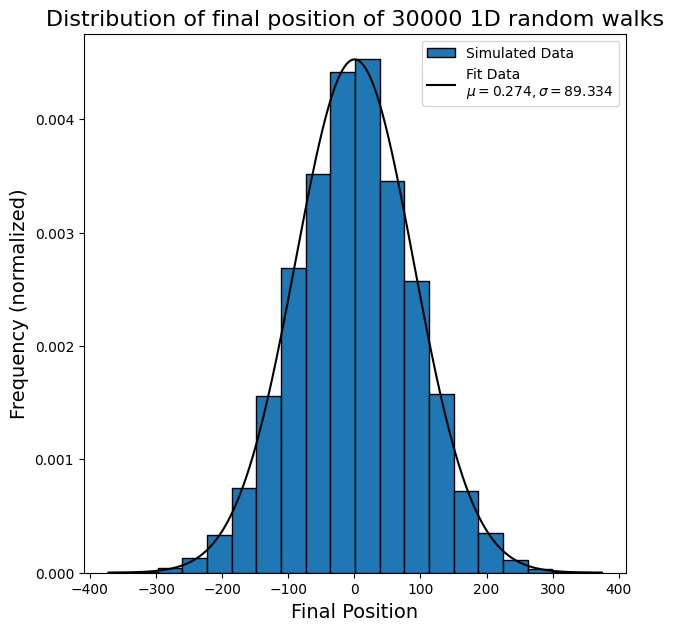

In [76]:
"""
A histogram for the final positions is plotted and a Gaussian is plotted over it. Furthermore the relation between the standard deviation and number of steps is checked.
"""

counts_1D, bins_1D, genObj_1D = plt.hist(last_step_1D, bins = 20, density = True, edgecolor = 'k', label = f"Simulated Data")

#Now a Gaussian is to be fited. This is done by using the usual formula for a Gaussian.

mean_pos_1D = np.mean(last_step_1D) #this is the average final position of N 1D walks
std_1D_pos = np.std(last_step_1D) #this is the standard deviation of the final position of N 1D walks

#priting the mean and standard deviation of the data and checking if square of standard deviation is approx equal to number of steps
print(f"The mean distance covered is {mean_pos_1D}")
print(f"The standard deivation is {std_1D_pos}")
print(f"The square of the standard deviation is {std_1D_pos ** 2} and the number of steps is {n_steps}")

x_vals_1D = np.linspace(bins_1D[0], bins_1D[len(bins_1D) - 1], 10000) #x axis for the gaussian plot
gaussian_1D = max(counts_1D) * np.exp(-((x_vals_1D - mean_pos_1D)**2)/(2*std_1D_pos**2))

plt.plot(x_vals_1D, gaussian_1D, color = 'k', label = r"Fit Data" "\n" r"$\mu"f"={round(mean_pos_1D,3)}," r"\sigma"f" = {round(std_1D_pos,3)}$")
plt.xlabel("Final Position", fontdict = font_custom_axes)
plt.ylabel("Frequency (normalized)", fontdict = font_custom_axes)
plt.title(f"Distribution of final position of {N} 1D random walks", fontdict = font_custom_titles)
plt.legend(loc = 'upper right')
plt.show()

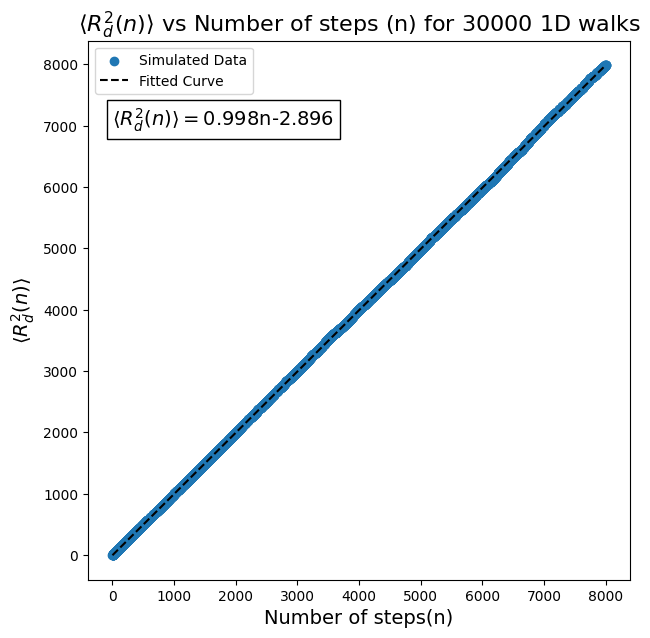

In [77]:
"""
Here the mean of the square of end-to-end distance averaged over all walks is plotted against the number of steps to verify the relation between the two.
"""

#We obtain the mean of the square of the end-to-end distance by first squaring all trajectories and then taking the mean of those
walks_sq_1D = walks_1D ** 2 #squaring the trajectories of all the walks
Rd_1D = np.mean(walks_sq_1D, axis = 0) #averaging along the rows to get average end-to-end distance squared for at each step

#polynomial of degree 1 is fitted using numpy.polyfit
steps_arr_1D = np.arange(0, n_steps+1, 1)
fit_params_1D, covar_matrix_1D = np.polyfit(steps_arr_1D, Rd_1D, deg = 1, cov = True)
slope_1D, intercept_1D = fit_params_1D

plt.scatter(steps_arr_1D, Rd_1D, label = 'Simulated Data')
plt.plot(steps_arr_1D, slope_1D * steps_arr_1D + intercept_1D, '--', color = 'k', label = 'Fitted Curve')
if intercept_1D < 0:
    plt.text(0, 7000, r'$\langle R_d^2(n)\rangle = $'f'{round(slope_1D, 3)}n' + f'{round(intercept_1D,3)}', fontdict = font_custom_axes, bbox = {'facecolor':'none'})
else:
    plt.text(0, 7000, r'$\langle R_d^2(n)\rangle = $'f'{round(slope_1D, 3)}n' + f'+{round(intercept_1D,3)}', fontdict = font_custom_axes, bbox = {'facecolor':'none'})
plt.xlabel("Number of steps(n)", fontdict = font_custom_axes)
plt.ylabel(r"$\langle R_d^2(n)\rangle$", fontdict = font_custom_axes)
plt.title(r"$\langle R_d^2(n)\rangle$ vs Number of steps (n) for "f"{N} 1D walks", fontdict = font_custom_titles)
plt.legend()
plt.show()

## **Random Walks in 2 Dimensions**
The same process as above for the 1D random walk is going to be followed here. However instead of left and right movements only this time the walker has the choice of moving left, right, up or down with equal probability. This is a random walk on a 2D lattice. 

Here 2 distributions are obtained, for the X and the Y direction. At the end the mean of the square of the end-to-end distance averaged over many walks is plotted versus the number of steps. The end-to-end distance for this case is the modulus of the vector sum of the movement in the X and Y directions.

In [78]:
"""
The same thing as above is done. But here the motion in the x and y direction are treated separetely. 
"""

@njit
def walk_2D(n_steps):
    toss = 0 #represents the toss to choose teh direction of motion
    x_pos = 0 #x coordinate of the walker
    y_pos = 0 #y coordinate of the walker
    x_traj = np.zeros(n_steps + 1) #trajectory of the walker in the x-direction
    y_traj = np.zeros(n_steps + 1) #trajectory of the walker in the y-direction
    x_traj[0] = 0; y_traj[0] = 0 #initial position of the walker is at the origin (0,0)

    for i in range(1, n_steps + 1):
        toss = np.random.randint(0,4) #0 is to move right, 1 is to move left, 2 is to move up, 3 is to move down
        if toss == 0:
            x_pos += 1
        elif toss == 1:
            x_pos -= 1
        elif toss == 2:
            y_pos += 1
        elif toss == 3:
            y_pos -= 1
        x_traj[i] = x_pos; y_traj[i] = y_pos
    final_x = x_traj[-1]; final_y = y_traj[-1] #final x and y coordinate of the walker respectively
    return final_x, x_traj, final_y, y_traj

In [79]:
"""
As before N = 30000 random walks are performed each of n_steps = 8000  and the x and y trajectories along with respective final positions are stored in separate arrays
"""

X_traj_2D, Y_traj_2D = np.zeros((N, n_steps + 1)), np.zeros((N, n_steps + 1)) #X and Y trajectories stored in 2D arrays of size N times n_steps + 1
X_final_2D, Y_final_2D = np.zeros(N), np.zeros(N) #Final X and Y coordinates of each walk
for i in range(N):
    X_final_2D[i], X_traj_2D[i], Y_final_2D[i], Y_traj_2D[i] = walk_2D(n_steps)

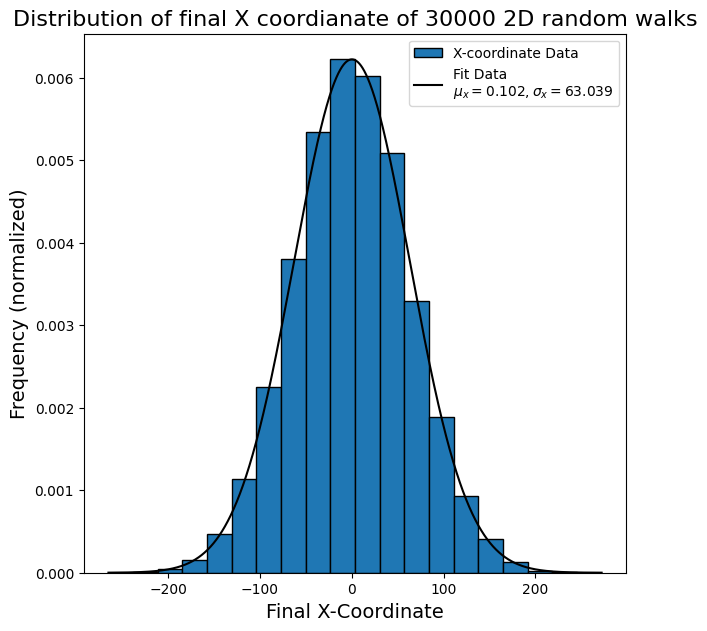

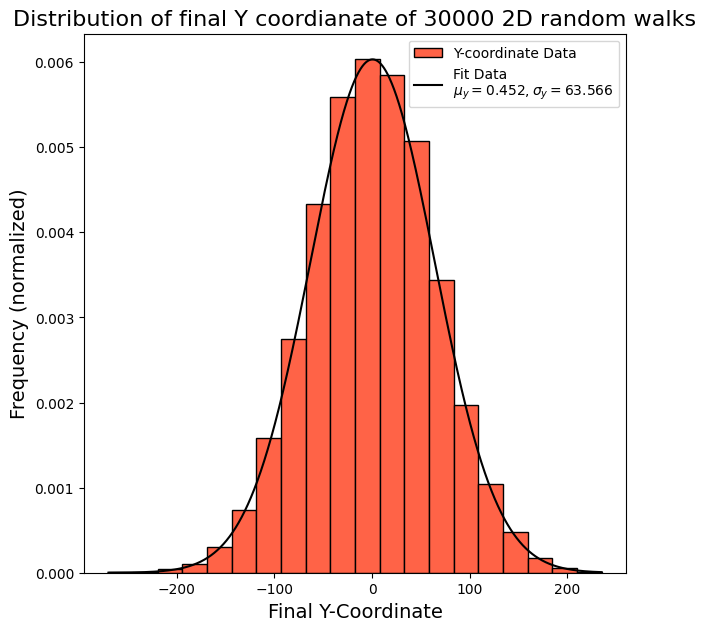

The mean distance covered is 0.4638001724881094
The standard deivation in X direction is 63.0386528659996 and in the Y direction is 63.566007170289794
The sum of squares of the two standard deviations are 7947.74351032 and the number of steps is 8000


In [80]:
"""
The histogram for the final X and Y coordinates are plotted here and a Gaussian is fitted to both individually
"""

#Plotting a histogram and fitting a Guassian over it for the final X coordinates
counts_2D_X, bins_2D_X, genObj_2D_X = plt.hist(X_final_2D, bins = 20, density = True, edgecolor = 'k', label = f"X-coordinate Data")

mean_pos_2D_X = np.mean(X_final_2D) #mean of the final X coordinate for N walks
std_2D_pos_X = np.std(X_final_2D) #standard deviation of the final X coordinates of N walks

x_vals_2D_X = np.linspace(bins_2D_X[0], bins_2D_X[len(bins_2D_X) - 1], 10000) #x axis for the gaussian plot for the final X coordinates
gaussian_2D_X = max(counts_2D_X) * np.exp(-((x_vals_2D_X - mean_pos_2D_X)**2)/(2*std_2D_pos_X**2))

plt.plot(x_vals_2D_X, gaussian_2D_X, color = 'k', label = r"Fit Data" "\n" r"$\mu_x"f"={round(mean_pos_2D_X,3)}," r"\sigma_x"f" = {round(std_2D_pos_X,3)}$")
plt.xlabel("Final X-Coordinate", fontdict = font_custom_axes)
plt.ylabel("Frequency (normalized)", fontdict = font_custom_axes)
plt.title(f"Distribution of final X coordianate of {N} 2D random walks", fontdict = font_custom_titles)
plt.legend(loc = 'upper right')
plt.show()

#Plotting a histogram and fitting a Gaussian over it for the final Y coordinates
counts_2D_Y, bins_2D_Y, genObj_2D_Y = plt.hist(Y_final_2D, bins = 20, density = True, edgecolor = 'k', color = 'tomato', label = f"Y-coordinate Data") 

mean_pos_2D_Y = np.mean(Y_final_2D) #mean of the final Y coordinate for N walks
std_2D_pos_Y = np.std(Y_final_2D) #standard deviation of the final Y coordinates of N walks

x_vals_2D_Y = np.linspace(bins_2D_Y[0], bins_2D_Y[len(bins_2D_Y) - 1], 10000) #x axis for the gaussian plot for the final Y coordinates
gaussian_2D_Y = max(counts_2D_Y) * np.exp(-((x_vals_2D_Y - mean_pos_2D_Y)**2)/(2*std_2D_pos_Y**2))

plt.plot(x_vals_2D_Y, gaussian_2D_Y, color = 'k', label = r"Fit Data" "\n" r"$\mu_y"f"={round(mean_pos_2D_Y,3)}," r"\sigma_y"f" = {round(std_2D_pos_Y,3)}$")
plt.xlabel("Final Y-Coordinate", fontdict = font_custom_axes)
plt.ylabel("Frequency (normalized)", fontdict = font_custom_axes)
plt.title(f"Distribution of final Y coordianate of {N} 2D random walks", fontdict = font_custom_titles)
plt.legend(loc = 'upper right')
plt.show()

#priting the mean and standard deviation of the data and checking if square of standard deviation is approx equal to number of steps
print(f"The mean distance covered is {np.sqrt(mean_pos_2D_X ** 2 + mean_pos_2D_Y ** 2)}")
print(f"The standard deivation in X direction is {std_2D_pos_X} and in the Y direction is {std_2D_pos_Y}")
print(f"The sum of squares of the two standard deviations are {std_2D_pos_X ** 2 + std_2D_pos_X ** 2} and the number of steps is {n_steps}")

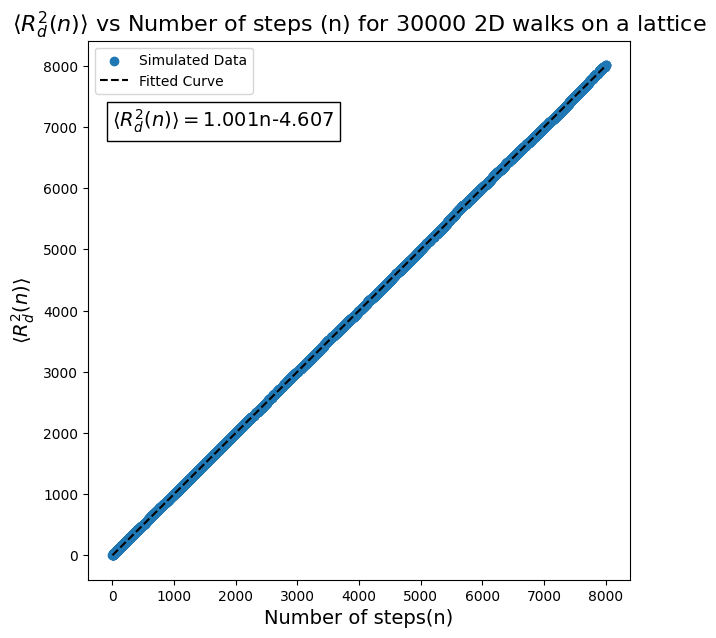

In [81]:
"""
Here as before the mean of the square of end-to-end distance averaged over all walks is plotted against the number of steps to verify the relation between the two.
"""

#We obtain the mean of the square of the end-to-end distance by first squaring all trajectories and then taking the mean of those
X_traj_2D_sq = X_traj_2D ** 2 #squaring the trajectories in X direction of all the walks
Y_traj_2D_sq = Y_traj_2D ** 2 #squaring the trajectories in Y direction of all the walks
avg_X_2D_sq = np.mean(X_traj_2D_sq, axis = 0) #mean of the distance square in X direction
avg_Y_2D_sq = np.mean(Y_traj_2D_sq, axis = 0) #mean of the distance square in Y direction

Rd_2D = avg_X_2D_sq + avg_Y_2D_sq #the total distance is the modulus of the vector sum of X and Y vectors

#polynomial of degree 1 is fitted using numpy.polyfit
steps_arr_2D = np.arange(0, n_steps+1, 1)
fit_params_2D, covar_matrix_2D = np.polyfit(steps_arr_2D, Rd_2D, deg = 1, cov = True)
slope_2D, intercept_2D = fit_params_2D

plt.scatter(steps_arr_2D, Rd_2D, label = 'Simulated Data')
plt.plot(steps_arr_2D, slope_2D * steps_arr_2D + intercept_2D, '--', color = 'k', label = 'Fitted Curve')
if intercept_2D < 0:
    plt.text(0, 7000, r'$\langle R_d^2(n)\rangle = $'f'{round(slope_2D, 3)}n' + f'{round(intercept_2D,3)}', fontdict = font_custom_axes, bbox = {'facecolor':'none'})
else:
    plt.text(0, 7000, r'$\langle R_d^2(n)\rangle = $'f'{round(slope_2D, 3)}n' + f'+{round(intercept_2D,3)}', fontdict = font_custom_axes, bbox = {'facecolor':'none'})
plt.xlabel("Number of steps(n)", fontdict = font_custom_axes)
plt.ylabel(r"$\langle R_d^2(n)\rangle$", fontdict = font_custom_axes)
plt.title(r"$\langle R_d^2(n)\rangle$ vs Number of steps (n) for "f"{N} 2D walks on a lattice", fontdict = font_custom_titles)
plt.legend()
plt.show()

## **Random Walks on a Continuum**
In this section the question stated above is answered and analyzed. This is done by modifying the code for the 2D walk on a lattice a little bit to allow for movements with variable step lengths in directions that are uniformly random

In [82]:
"""
The random walk is in 2D with the step length being a random floating point number between 0 and 1 and the direction being between 0 and 2pi also uniformly random.
"""

@njit
def walk2D_continuum(n_steps):
    
    step = 0 #step length is in between 0 and 1 and is uniformly random
    direction = 0 #direction in between 0 and 2pi and is uniformly random
    x_traj = np.zeros(n_steps + 1) #coordinates in x direction
    y_traj = np.zeros(n_steps + 1) #coordinates in y direction
    x_traj[0] = 0; y_traj[0] = 0
    
    for i in range(1, n_steps+1):
        direction = np.random.uniform(0, 2*np.pi)
        step = np.random.uniform(0, 1)
        x_traj[i] = x_traj[i-1] + step * np.cos(direction) #computing the step based on direction and previous step in the x direction
        y_traj[i] = y_traj[i-1] + step * np.sin(direction) #computing the step based on direction and previous step in the y direction
    
    final_x = x_traj[-1]
    final_y = y_traj[-1]
    return x_traj, y_traj, final_x, final_y

In [83]:
"""
As before N = 50000 random walks are performed each of n_steps = 10000 and the x and y trajectories along with respective final positions are stored in separate arrays
"""
X_traj_continuum, Y_traj_continuum, Final_X_continuum, Final_Y_continuum = np.zeros((N, n_steps + 1)), np.zeros((N, n_steps + 1)), np.zeros(N), np.zeros(N)
for i in range(N):
    X_traj_continuum[i], Y_traj_continuum[i], Final_X_continuum[i], Final_Y_continuum[i] = walk2D_continuum(n_steps)

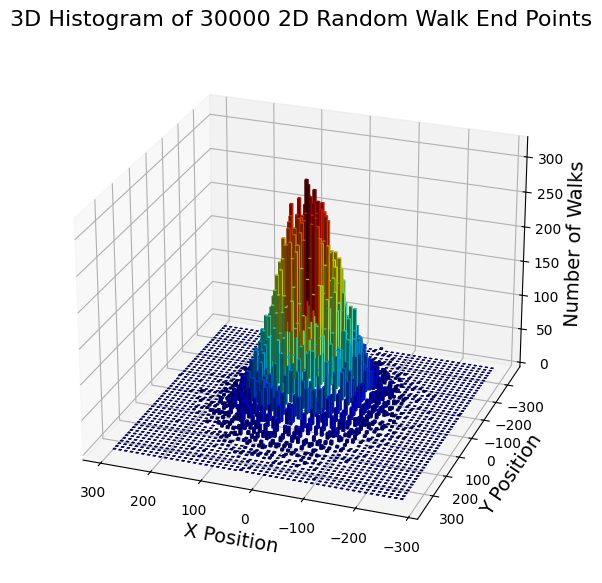

In [84]:
"""
Instead of 2 2D histograms for each of the X and Y final coordinates a 3D histogram for the X and Y final positions is plotted here
"""

# number of bins for histogram is defined
nb_bins_x = 50
nb_bins_y = 50

# 3D histogram is created 
hist, xedges, yedges = np.histogram2d(Final_X_continuum, Final_Y_continuum, bins=(nb_bins_x, nb_bins_y))

# Generate positions for the bars
xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

# Flatten the data for plotting
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = hist.flatten()

# Calculate bar width based on bin edges
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
dz = hist.flatten()  # Already flattened

# Define a colormap for the histogram
cmap = plt.cm.jet

# Get the minimum and maximum values for normalization
max_height = np.max(dz)
min_height = np.min(dz)

# Normalize z values for color mapping (0 to 1)
rgba = [cmap((k - min_height) / max_height) for k in dz]

# Create the 3D plot
#fig = plt.figure(figsize=(10, 7))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the bars with color based on count
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')

# Set labels and title
ax.set_xlabel('X Position', fontdict = font_custom_axes)
ax.set_ylabel('Y Position', fontdict = font_custom_axes)
ax.set_zlabel('Number of Walks', fontdict = font_custom_axes)
ax.set_title(f'3D Histogram of {N} 2D Random Walk End Points', fontdict = font_custom_titles)

# Viewing angle is adjusted
ax.view_init(elev=25, azim=110) 

plt.show()

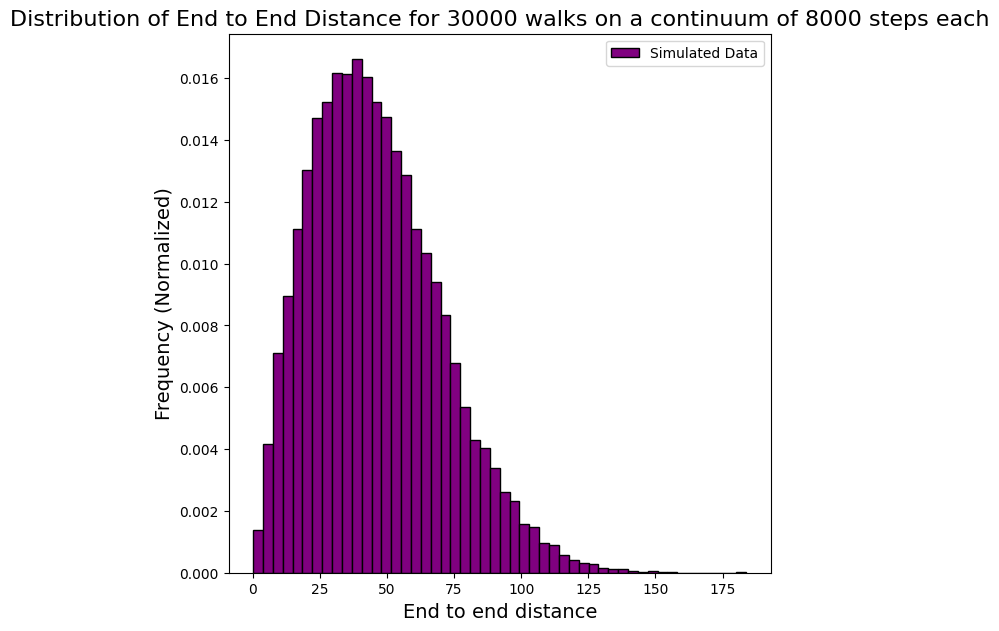

In [85]:
"""
A histogram of the end-to-end distance for each walk is plotted to check the form of the distribution and verify if it is a Boltzmann distribution or not
"""
R_continuum = np.sqrt(Final_X_continuum**2+Final_Y_continuum**2)
counts_2D_continuum, bins_2D_continuum, genObj_2D_continuum = plt.hist(R_continuum, bins = 50, density = True, edgecolor = 'k', color = 'purple', label = 'Simulated Data')
plt.xlabel("End to end distance", fontdict = font_custom_axes)
plt.ylabel("Frequency (Normalized)", fontdict = font_custom_axes)
plt.title(f"Distribution of End to End Distance for {N} walks on a continuum of {n_steps} steps each", fontdict = font_custom_titles)
plt.legend()
plt.show()

The slope of the log-log plot is 0.501 and the intercept is -0.776


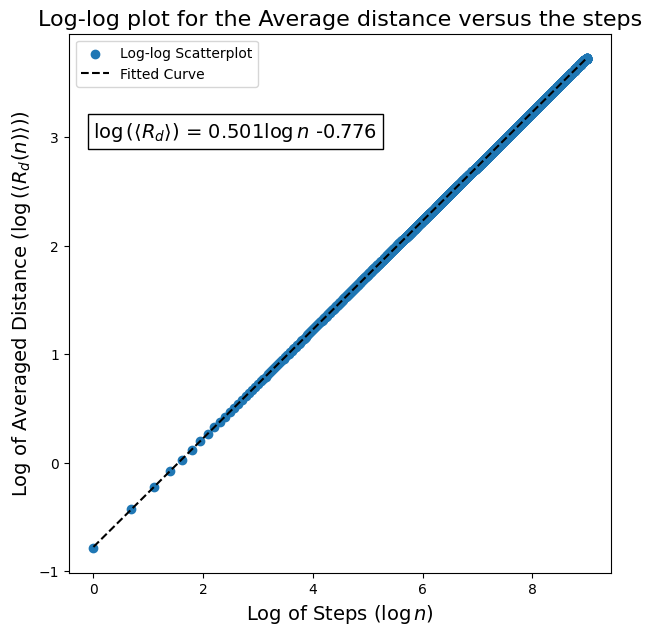

In [86]:
"""
The power law relation between the mean end to end distance versus the number of steps is obtained here by fitting a straight line to the log-log graph of the distance and the steps. This is done by first calculating the mean of the absolute values of the X and Y coordinates for all walks and then using those means to find the distance.
"""

steps_arr_continuum = np.arange(0, n_steps + 1)
avg_X_continuum = np.mean(np.abs(X_traj_continuum), axis = 0) #the average x coordinate at each step
avg_Y_continuum = np.mean(np.abs(Y_traj_continuum), axis = 0) #the average y coordiante at each step
R_mean_continuum = np.sqrt(avg_X_continuum**2 + avg_Y_continuum**2) #the average distance from the origin at each step

#new variables for log-log plot
log_steps_arr = np.log(steps_arr_continuum[1:]) #disregarding the first point which is (0,0)
log_R_mean = np.log(R_mean_continuum[1:])

#scatter plot of log-log for the average end-to-end distance and the steps
plt.scatter(log_steps_arr, log_R_mean, label = 'Log-log Scatterplot') 

#fitting a straight line
fit_params_continuum, covar_matrix_continuum = np.polyfit(log_steps_arr, log_R_mean, deg = 1, cov = True)
slope_continuum, intercept_continuum = np.round(fit_params_continuum,3)
fit_continuum = slope_continuum * log_R_mean + intercept_continuum
print(f"The slope of the log-log plot is {slope_continuum} and the intercept is {intercept_continuum}")
plt.plot(log_steps_arr, slope_continuum * log_steps_arr + intercept_continuum, '--', color = 'k', label = 'Fitted Curve')

plt.xlabel(r'Log of Steps ($\log{n}$)', fontdict = font_custom_axes)
plt.ylabel(r'Log of Averaged Distance ($\log{(\langle{R_d(n)}\rangle)}$)', fontdict = font_custom_axes)
plt.title("Log-log plot for the Average distance versus the steps", fontdict = font_custom_titles)
plt.text(0, 3, r'$\log{(\langle{R_d}\rangle)}$ = 'f'{round(slope_continuum, 3)}'r'$\log{n}$'f' {round(intercept_continuum, 3)}', fontdict = font_custom_axes, bbox = {'facecolor' : 'none'})
plt.legend()
plt.show()